In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Example

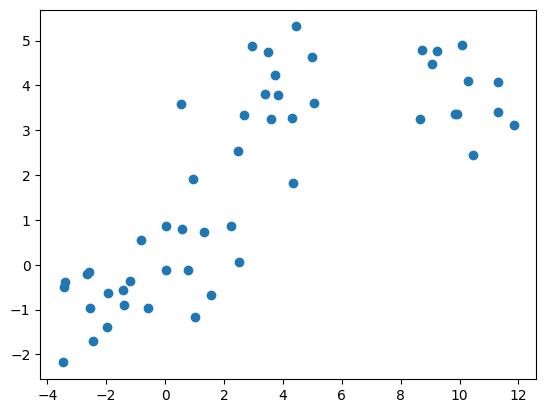

In [13]:
# random data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
# X1 contains location in 2D array: rows: each point, columns: [x, y]
# y1 is the classification: 0-3
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [14]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

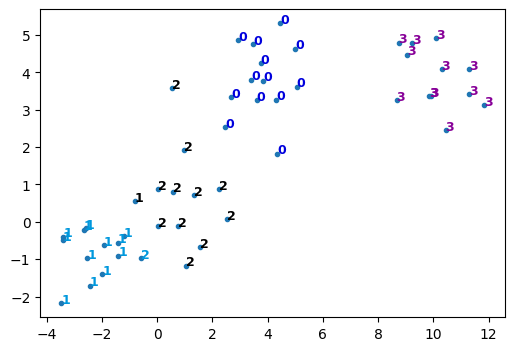

In [15]:
plt.figure(figsize=(6,4))
for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

plt.scatter(X1[:, 0], X1[:, 1], marker='.')

# Now with real data

This cases uses `AgglomerativeClustering` to cluster different car models based on different features.

In [18]:
pdf = pd.read_csv('NonUploadedData/cars_clus.csv')
pdf

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,$null$,0.000,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000,2.864,0.0
155,Volvo,C70,3.493,$null$,0.000,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000,1.251,0.0
156,Volvo,S80,18.969,$null$,0.000,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000,2.943,0.0
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0


In [19]:
# cleaning
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)

featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
featureset

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0
...,...,...,...,...,...,...,...,...
112,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0
113,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0
114,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0
115,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0


In [20]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler

x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)

In [21]:
agglom = AgglomerativeClustering(n_clusters=6, linkage='complete')
agglom.fit(feature_mtx)
agglom.labels_

pdf['cluster_'] = agglom.labels_
pdf.head()

import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

Text(0, 0.5, 'mpg')

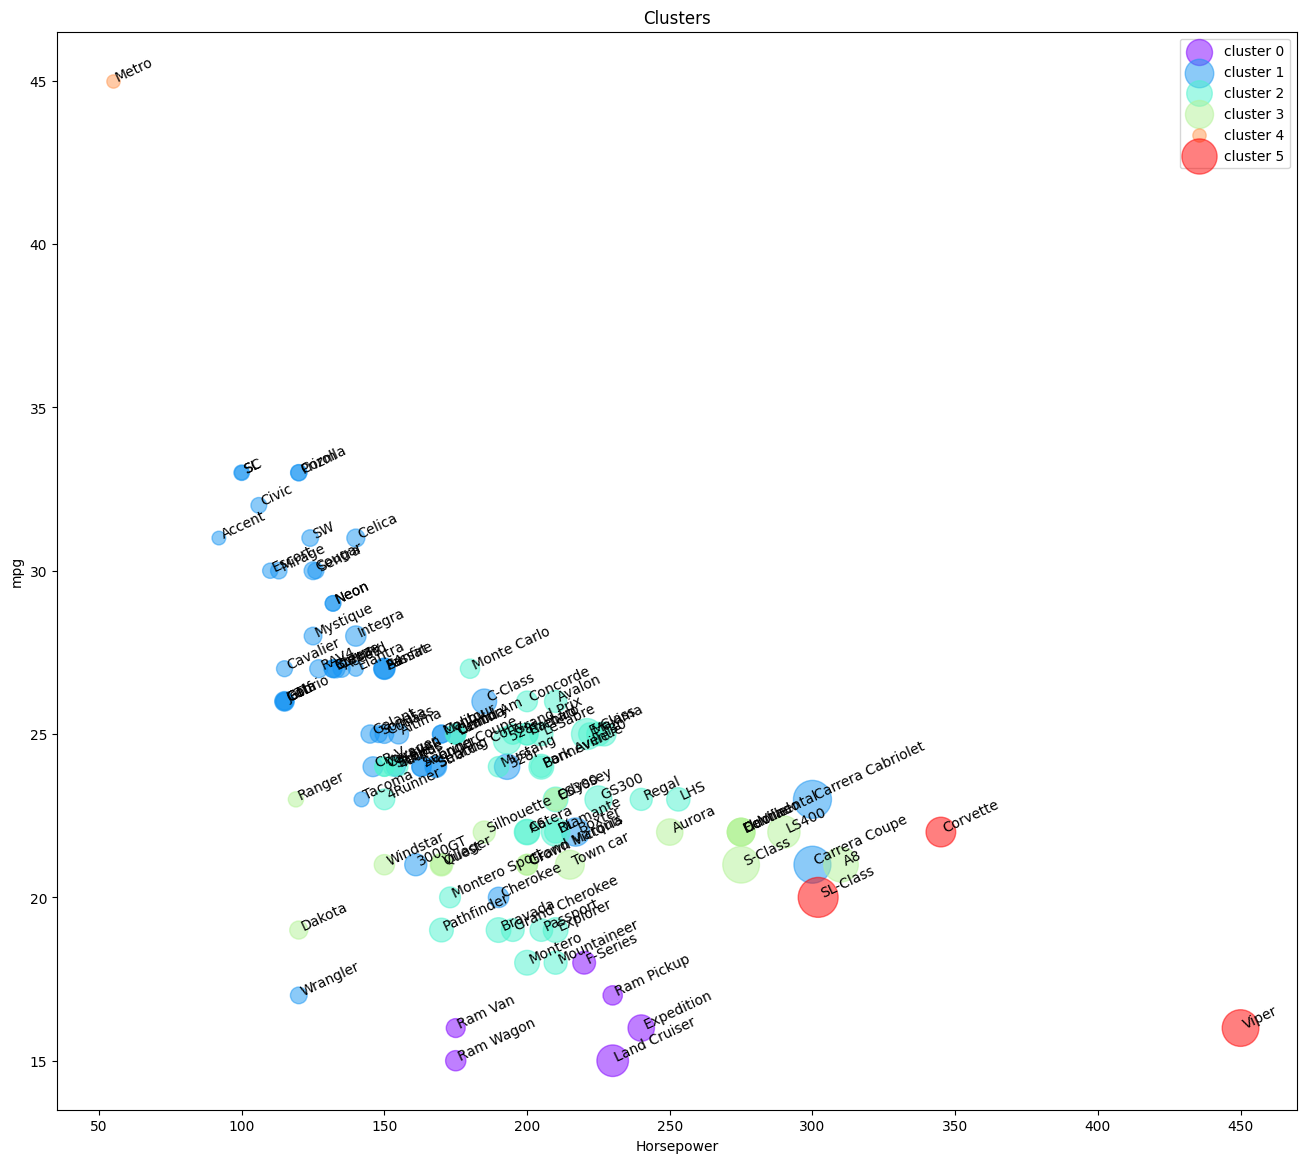

In [39]:
plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, color=color, label=f'cluster {label}', alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Horsepower')
plt.ylabel('mpg')

In [40]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

In [43]:
agg_cars = pdf.groupby(['cluster_','type'])[['horsepow','engine_s','mpg','price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

Text(0, 0.5, 'mpg')

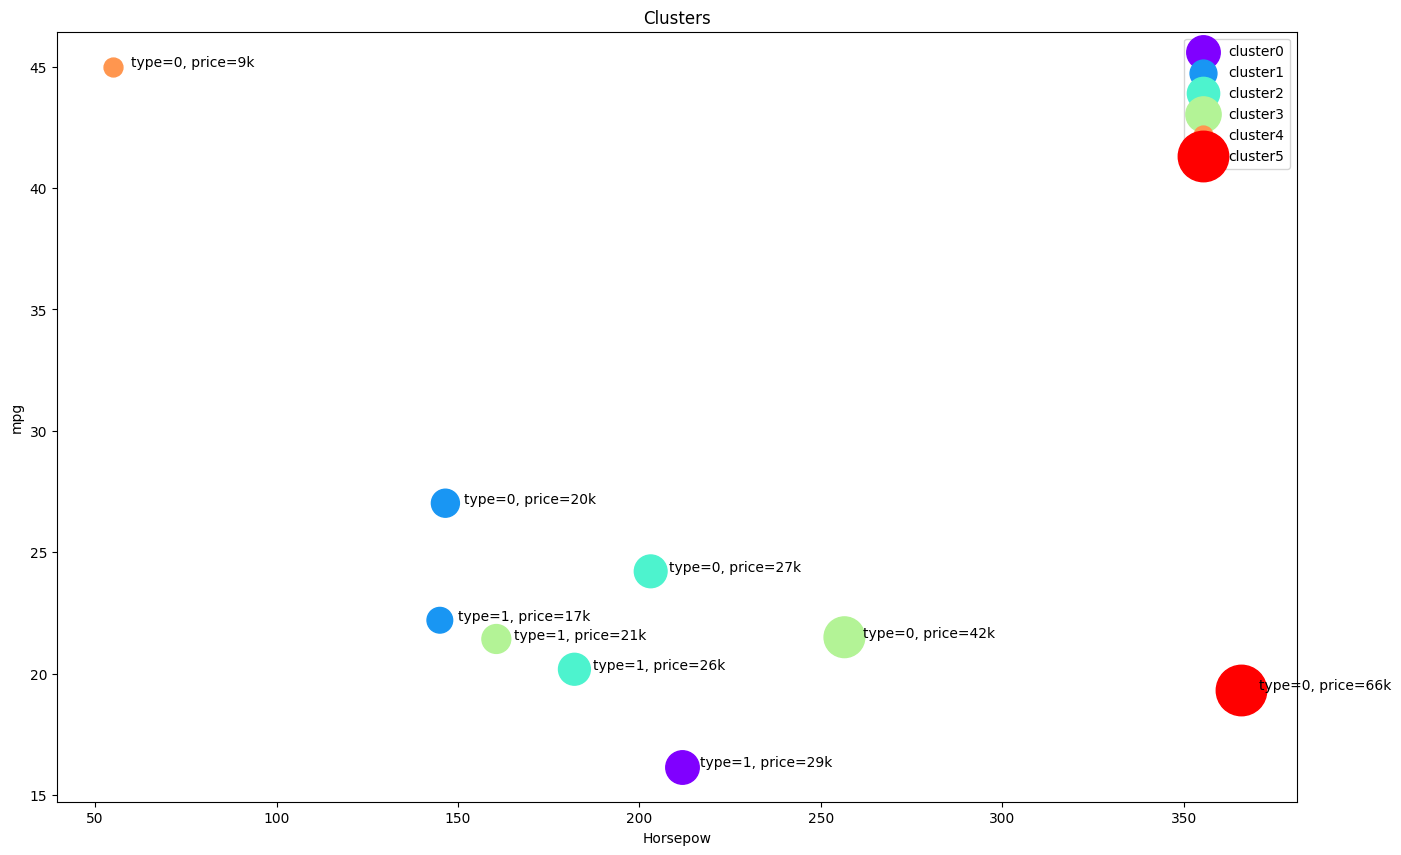

In [45]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[label]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, color=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('Horsepow')
plt.ylabel('mpg')


# Another example with real data

This one uses the algorithm `DBSCAN` to cluster different weather stations in Canada based on their coordinates.

In [45]:
from mpl_toolkits.basemap import Basemap
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [40]:
df = pd.read_csv('NonUploadedData/weather-stations20140101-20141231.csv')
df.head(4)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475


In [41]:
df.columns

Index(['Stn_Name', 'Lat', 'Long', 'Prov', 'Tm', 'DwTm', 'D', 'Tx', 'DwTx',
       'Tn', 'DwTn', 'S', 'DwS', 'S%N', 'P', 'DwP', 'P%N', 'S_G', 'Pd', 'BS',
       'DwBS', 'BS%', 'HDD', 'CDD', 'Stn_No'],
      dtype='object')

In [42]:
df.dropna(subset=['Tm'], inplace=True)  # drop rows where Tm is NaN
df.reset_index(drop=True, inplace=True)
df

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,NAIN A,56.550,-61.683,NL,-22.6,0.0,-5.2,-6.8,0.0,-33.5,...,0.0,66.0,74.0,5.0,NaN,NaN,NaN,1136.5,0.0,8502800
1252,NAIN A,56.551,-61.682,NL,-19.2,24.0,NaN,-7.5,17.0,NaN,...,17.0,NaN,NaN,4.0,NaN,NaN,NaN,148.7,0.0,8502801
1253,SAGLEK,58.333,-62.586,NL,-24.4,2.0,NaN,-13.5,1.0,-32.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101.2,0.0,8503249
1254,TUKIALIK BAY,54.716,-58.358,NL,-22.8,2.0,NaN,-5.8,1.0,-32.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1060.0,0.0,8503992


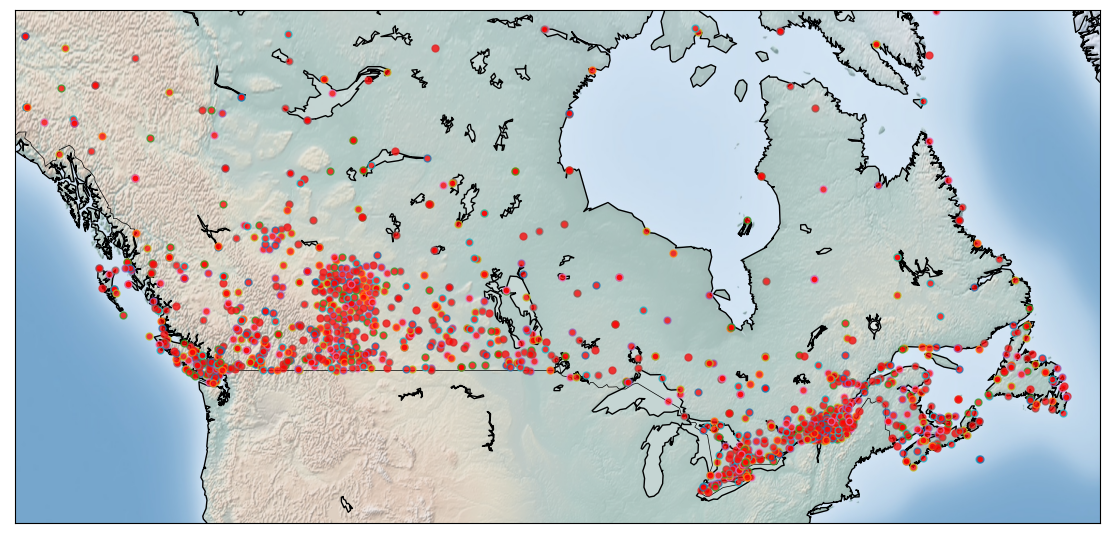

In [43]:
llon=-140
ulon=-50
llat=40
ulat=65

df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) & (df['Lat'] < ulat)].copy()

# adding the map
plt.figure(figsize=(14,10))
my_map = Basemap(projection='merc',
    resolution='l', area_thresh=1000.0,
    llcrnrlon=llon, llcrnrlat=llat,  # min longitude and latitude
    urcrnrlon=ulon, urcrnrlat=ulat)  # max longitude and latitude

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

# adding the station data to the map
xs, ys = my_map(df.Long.values, df.Lat.values)
df['xm'] = xs
df['ym'] = ys

for index,row in df.iterrows():
   my_map.plot(row.xm, row.ym, markerfacecolor=([1,0,0]), marker='o', markersize=5, alpha=0.75)
plt.show()

## clustering based on their location (lat and long)

In [48]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = df[['xm', 'ym']].copy()
Clus_dataSet.fillna(0, inplace=True)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN to create clusters
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df["Clus_Db"] = labels

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

Cluster 0, Avg Temp: -5.538747553816046
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


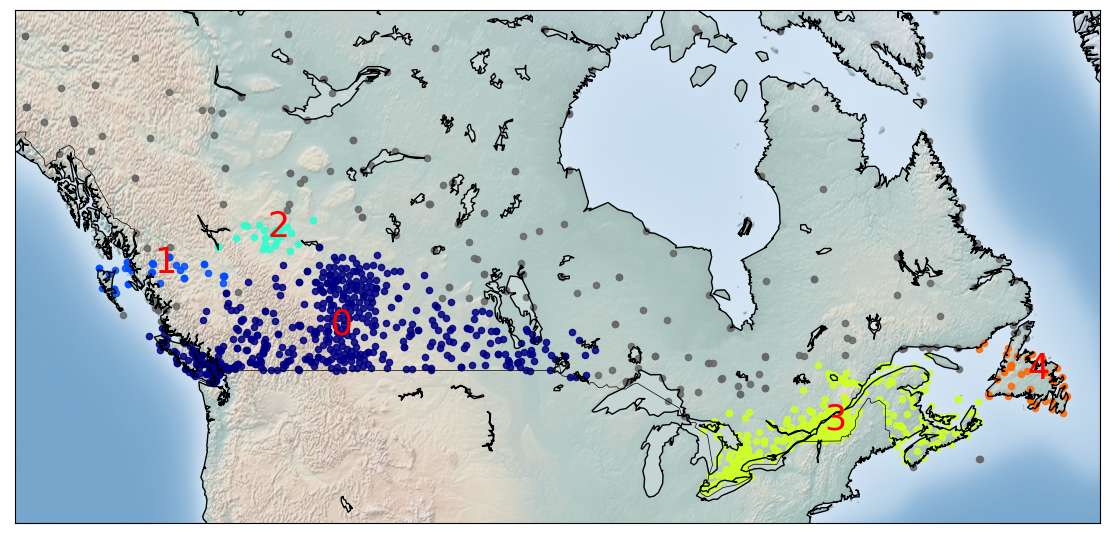

In [51]:
# adding the map
plt.figure(figsize=(14,10))
my_map = Basemap(projection='merc',
    resolution='l', area_thresh=1000.0,
    llcrnrlon=llon, llcrnrlat=llat,  # min longitude and latitude
    urcrnrlon=ulon, urcrnrlat=ulat)  # max longitude and latitude

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

# adding the station data to the map with colormap
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    # grey if cluster number is -1, so it is not in any cluster
    c = (([0.4,0.4,0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = df[df.Clus_Db == clust_number]
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=20, alpha=0.85)
    if clust_number != -1:
        cenx = np.mean(clust_set.xm)
        ceny = np.mean(clust_set.ym)
        plt.text(cenx, ceny, str(clust_number), fontsize=25, color='red',)
        print(f"Cluster {clust_number}, Avg Temp: {np.mean(clust_set.Tm)}")

## clustering based on their location (lat and long) and mean temperature

In [57]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = df[['xm','ym','Tm']].copy()
Clus_dataSet.fillna(0, inplace=True)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN to create clusters
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df["Clus_Db"] = labels

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

Cluster 0, Avg Temp: 7.993814432989689
Cluster 1, Avg Temp: 6.26
Cluster 2, Avg Temp: 2.7524590163934426
Cluster 3, Avg Temp: -8.5646408839779
Cluster 4, Avg Temp: -0.44999999999999996
Cluster 5, Avg Temp: -18.888461538461534
Cluster 6, Avg Temp: -15.685531914893618
Cluster 7, Avg Temp: -16.618181818181817
Cluster 8, Avg Temp: -21.415384615384614
Cluster 9, Avg Temp: -12.706451612903226


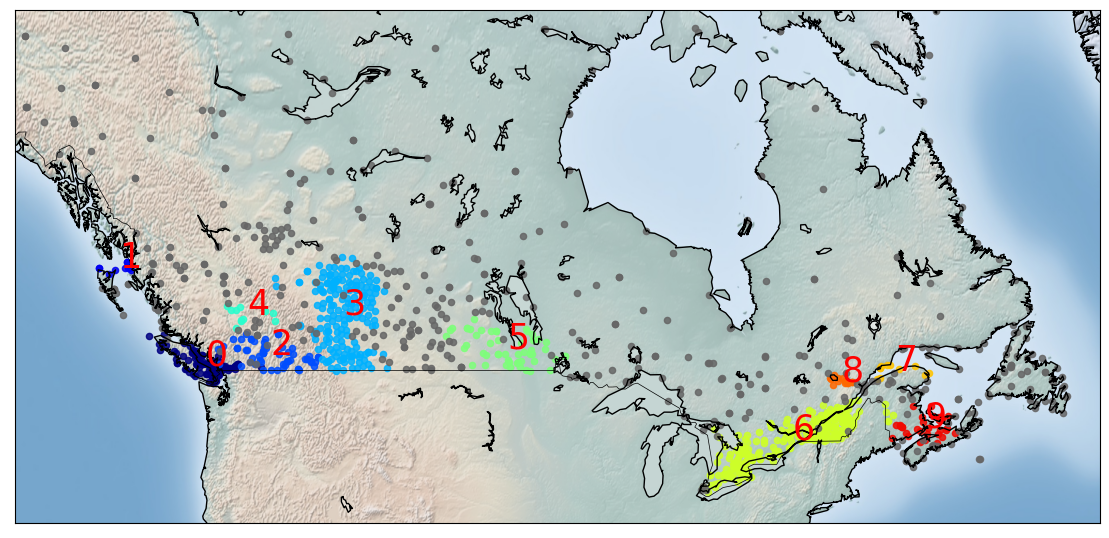

In [58]:
# adding the map
plt.figure(figsize=(14,10))
my_map = Basemap(projection='merc',
    resolution='l', area_thresh=1000.0,
    llcrnrlon=llon, llcrnrlat=llat,  # min longitude and latitude
    urcrnrlon=ulon, urcrnrlat=ulat)  # max longitude and latitude

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

# adding the station data to the map with colormap
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    # grey if cluster number is -1, so it is not in any cluster
    c = (([0.4,0.4,0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = df[df.Clus_Db == clust_number]
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=20, alpha=0.85)
    if clust_number != -1:
        cenx = np.mean(clust_set.xm)
        ceny = np.mean(clust_set.ym)
        plt.text(cenx, ceny, str(clust_number), fontsize=25, color='red',)
        print(f"Cluster {clust_number}, Avg Temp: {np.mean(clust_set.Tm)}")